In [188]:
import numpy as np
import glob, sys
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
# Read in our ROI RDMs. Average them over all nodes in the ROI. Concatenate left and right hemispheres
ds = [np.load(f) for f in sorted(glob.glob(results+'rsa_roi*'+'.npy'))]
avgd = [np.mean(f, axis=1) for f in ds]
concatenated = []
for i in range(0, len(avgd), 2):
    lh = avgd[i]
    rh = avgd[i+1]
    concatenated.append(np.concatenate((lh,rh),axis=0))
# correlate all ROI RDMs
all_rois = np.array(concatenated)    
roi_corr = squareform(pdist(all_rois, 'correlation'))


In [190]:
# Set up for plotting
figdir = '/dartfs-hpc/scratch/psyc164/mvpaces/lab2/figs/'
roi_colors = {
    'EBA': 'blue',
    'FFA': 'green',
    'IPS': 'purple',
    'OP': 'orange',
    'PM': 'red'
}

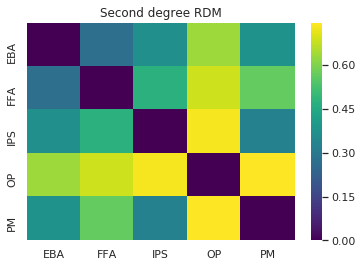

In [191]:
# Plot correlations of RDMs in each ROI
sns.set()
sns.heatmap(roi_corr, xticklabels=rois, yticklabels=rois, cmap='viridis')
plt.title('Second degree RDM')
plt.savefig(figdir+'2_deg_RDM.png')

In [192]:
from sklearn.manifold import MDS

In [196]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(roi_corr)

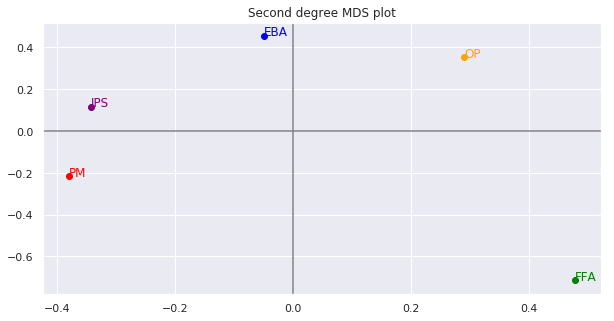

In [199]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(roi_corr)
plt.figure(figsize=(10,5))
for i, txt in enumerate(roi_colors.keys()):
    plt.scatter(X_transformed[i,0], X_transformed[i,1], color=roi_colors.get(txt))
    plt.annotate(txt, (X_transformed[i,0], X_transformed[i,1]), color=roi_colors.get(txt))
plt.title('Second degree MDS plot')
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.savefig(figdir+'2_deg_mds.png')